In [1]:
import mdptoolbox
import numpy as np
import time
import stolenmdp

In [2]:
#Build transition matrix
transition2=np.zeros((2,3000,3000))
#actions
#action0=plant more seeds
#action1=don't plant more seeds
#states
#first digit= suggested season to plant seeds? (0= yes, 1=soon or recently, 2= bad time)
#second digit= free space on land (0-9)
#third digit= demand for crop (0-9)
#fourth digit= soil quality (0-9)

s=range(0,3000,1)
for i in s:
    season=i//1000
    space=i//100 -season*10
    demand=i//10-space*10 -season*100
    soil=i-demand*10- space*100 - season*1000
    #soil quality goes up if you don't plant, down if you do plant
    #space either goes up or stays the same if you don't plant, goes down if you do plant
    #season changes randomly, Pr=20% that it changes, 10% for either value
    transition2[:,i,i]=0.00000001
    if (soil not in [0]) & (space not in [0]):
        transition2[0,i,i-101]+=0.7
        transition2[0,i,i-101-season*1000]+=0.1
        transition2[0,i,i-101-season*1000+1000]+=0.1
        transition2[0,i,i-101-season*1000+2000]+=0.1
    elif (soil not in [9]) & (space not in [9]):
        transition2[1,i,i+1]+=0.35
        transition2[1,i,i+101]+=0.35
        transition2[1,i,i+1-season*1000]+=0.05
        transition2[1,i,i+101-season*1000]+=0.05
        transition2[1,i,i+1-season*1000+1000]+=0.05
        transition2[1,i,i+101-season*1000+1000]+=0.05
        transition2[1,i,i+1-season*1000+2000]+=0.05
        transition2[1,i,i+101-season*1000+2000]+=0.05
    #normalize
    sum1=np.sum(transition2[0,i,:])
    transition2[0,i,:]=transition2[0,i,:]/sum1
    sum2=np.sum(transition2[1,i,:])
    transition2[1,i,:]=transition2[1,i,:]/sum2


reward=np.ones((2,3000,3000))
reward=reward*0.1
for i in s:
    season=i//1000
    space=i//100 -season*10
    demand=i//10-space*10 -season*100
    soil=i-demand*10- space*100 - season*1000 
    if soil<5:
        reward[0,i,:]=-10*(5-soil) #penalty for planting on bad soil
    else:
        reward[1,i,:]=-10 #pentalty for not planting on good soil
    if season==0:
        reward[0,i,:]+=50 #reward for planting in good season
        reward[1,i,:]-=50
    elif season==2:
        reward[0,i,:]-=50
        reward[1,i,:]-=50
    if space==0:
        reward[0,i,:]-=1000
    reward[0,i,:]+=(demand-5)*10
    reward[1,i,:]-=(demand-5)*10



In [3]:
#Policy Iteration
problem2=mdptoolbox.mdp.PolicyIteration(transition2, reward, 0.8, eval_type=1)
#problem2.setVerbose()
problem2.run()
value2p=problem2.V
policy2p=problem2.policy
print(problem2.iter)
print(problem2.time)


3
0.6651270389556885


In [4]:

#Value Iteration
problem2=mdptoolbox.mdp.ValueIteration(transition2, reward, 0.8, max_iter=1000) #1, max_iter=100)
#problem2.setVerbose()
problem2.run()
value2v=problem2.V
policy2v=problem2.policy
#print(value2)
#print(policy2)
print(problem2.iter)
print(problem2.time)

51
0.29869890213012695


In [5]:
#Q Learning
problem2=mdptoolbox.mdp.QLearning(transition2, reward, 0.8, n_iter=10000)
problem2.setVerbose()
time1=time.time()
problem2.run()
time2=time.time()
value2q=problem2.V
policy2q=problem2.policy
qtime=time2-time1
#print(value2q)
#print(policy2q)
print(qtime)

8.02291464805603


In [22]:
timeval=[]
policies=[]
epsval=[0.1,0.25,0.5,0.75,0.99]
for e in epsval:
    problem1=stolenmdp.staceyQLearning(transition2, reward, 0.8, n_iter=10000, eps=e)
    problem1.setVerbose()
    time1=time.time()
    problem1.run()
    time2=time.time()
    value2=problem1.V
    policy2=problem1.policy
    policies.append(policy2)
    
    qtime=time2-time1
    timeval.append(qtime)
    #print(qtime)
#print(problem1.iter)
#print(problem1.time)


here
here
here
here
here


In [7]:
value2v=np.asarray(value2v)
value2p=np.asarray(value2p)
value2q=np.asarray(value2q)
policy2p=np.asarray(policy2p)
policy2v=np.asarray(policy2v) #-policy2v
policy2q=np.asarray(policy2q)

diffpolicy=policy2p-policy2v
policysum=np.sum(abs(diffpolicy))
policysum



0

In [8]:
diffvalue=value2v-value2p
valuesum=np.sum(abs(diffvalue))
valuesum

4.115300012318567

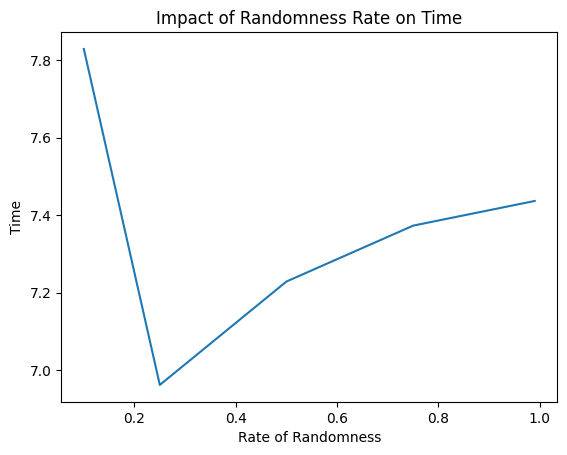

In [17]:
import matplotlib.pyplot as plt
plt.plot(epsval, timeval)
#plt.legend(["Consistent Randomness", "Decaying Randomness"])
plt.xlabel("Rate of Randomness")
plt.ylabel("Time")
plt.title("Impact of Randomness Rate on Time")
plt.show()

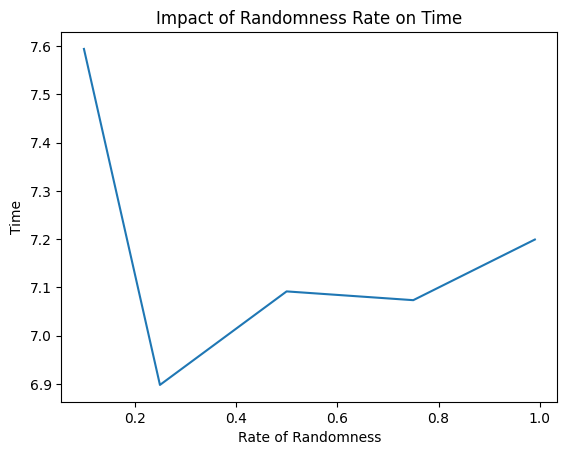

In [19]:
import matplotlib.pyplot as plt
plt.plot(epsval, timeval)
#plt.legend(["Consistent Randomness", "Decaying Randomness"])
plt.xlabel("Rate of Randomness")
plt.ylabel("Time")
plt.title("Impact of Randomness Rate on Time")
plt.show()

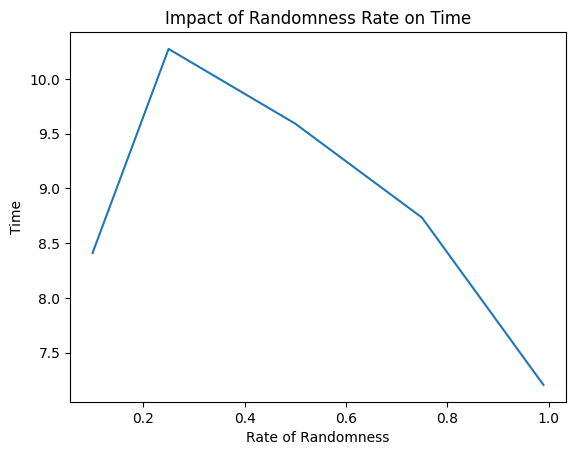

In [23]:
import matplotlib.pyplot as plt
plt.plot(epsval, timeval)
#plt.legend(["Consistent Randomness", "Decaying Randomness"])
plt.xlabel("Rate of Randomness")
plt.ylabel("Time")
plt.title("Impact of Randomness Rate on Time")
plt.show()

In [26]:
policy2p=np.asarray(policy2p)
policy2v=np.asarray(policy2v) #-policy2v
policy1q=np.asarray(policies[0])
policy2q=np.asarray(policies[1])
policy3q=np.asarray(policies[2])
policy4q=np.asarray(policies[3])
policy5q=np.asarray(policies[4])

diffpolicy1=policy2p-policy1q
diffpolicy2=policy2p-policy2q
diffpolicy3=policy2p-policy3q
diffpolicy4=policy2p-policy4q
diffpolicy5=policy2p-policy5q
policysum1=np.sum(abs(diffpolicy1))
policysum2=np.sum(abs(diffpolicy2))
policysum3=np.sum(abs(diffpolicy3))
policysum4=np.sum(abs(diffpolicy4))
policysum5=np.sum(abs(diffpolicy5))

print(policysum1)
print(policysum2)
print(policysum3)
print(policysum4)
print(policysum5)
policylist=[policysum1, policysum2,policysum3, policysum4, policysum5]
policylist/30

857
890
866
971
940


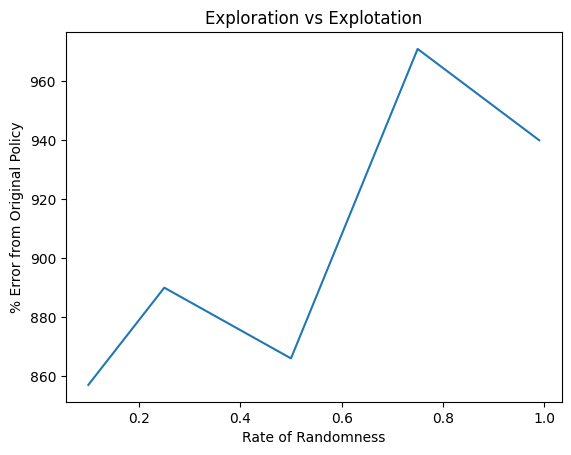

In [27]:
import matplotlib.pyplot as plt
plt.plot(epsval, policylist)
#plt.legend(["Consistent Randomness", "Decaying Randomness"])
plt.xlabel("Rate of Randomness")
plt.ylabel("% Error from Original Policy")
plt.title("Exploration vs Explotation")
plt.show()